### Import necessary libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [26]:
pd.__version__ #To import the excel file

'2.0.3'

#### Reading our data file for our analysis.

In [27]:
data_df = pd.read_excel('regression_data.xls')

 Taking a look at the first five rows of our data to know how it looks.

In [28]:
data_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [29]:
row, col = data_df.shape
print("The dataset has",row,"rows and",col,"columns" )

The dataset has 21597 rows and 21 columns


In [30]:
duplicates = data_df[data_df.duplicated(subset=['id'])]
print("We have",len(duplicates),"duplicates in our id column")

We have 177 duplicates in our id column


In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

Since we couldn't find any missing values in our dataset, we only have to proceed with other manipulations.

<Axes: title={'center': 'Heatmap of missing values'}>

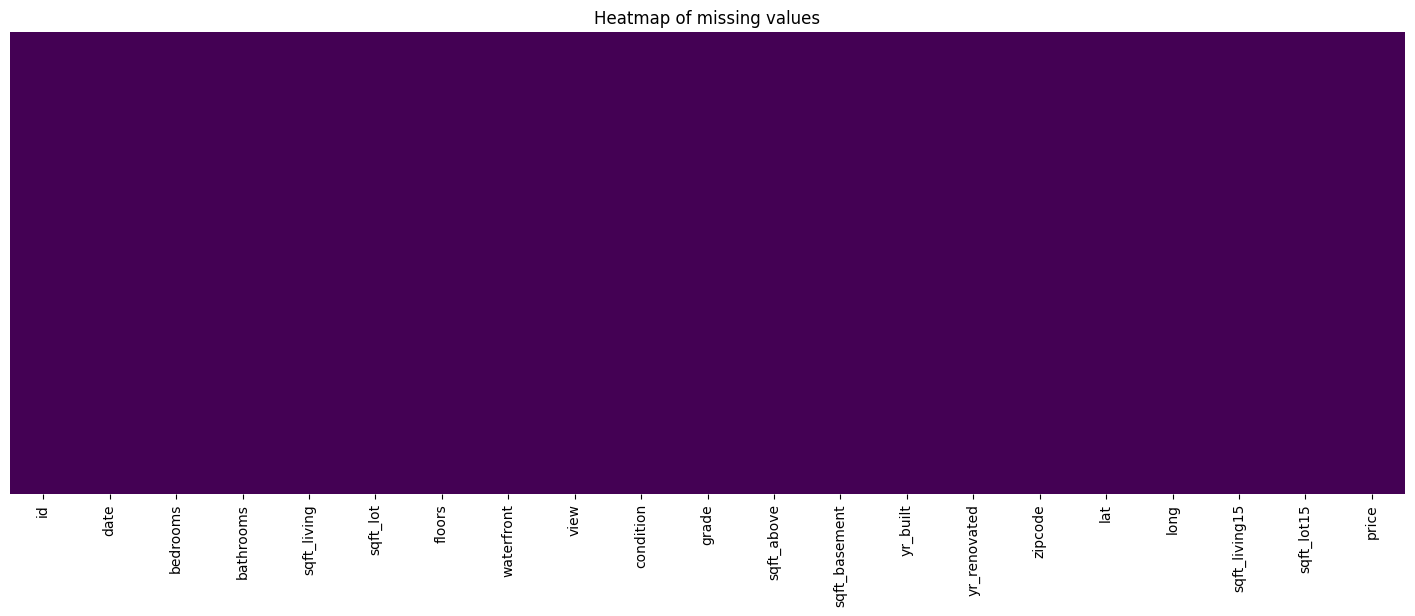

In [32]:
#Checking Null or missing values by using heatmap
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(data_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Manipulations and Cleaning.

In [33]:
#Extracting month and year from  'Date' column for better comparison.
data_df['year']= pd.DatetimeIndex(data_df['date']).year 
data_df['month']= pd.DatetimeIndex(data_df['date']).month

In [34]:
#Dropping the date column since we have a better column for better comparison
data_df = data_df.drop(['date'], axis=1)

# Running the top 5 rows to see if the dropped column had been dropped.
data_df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,10
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,12
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,2
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,12
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,2


In [35]:
# Converting the zipcode to a string, this would help us to check the relation they have with other columns.

data_df['zipcode'] = data_df['zipcode'].astype(str)

In [36]:
data_df.corr().apply(lambda x: round(x,4))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
id,1.0000,0.0012,0.0052,-0.0122,-0.1319,0.0186,-0.0027,0.0115,-0.0238,0.0082,...,0.0216,-0.0169,-0.0082,-0.0018,0.0207,-0.0027,-0.1386,-0.0168,0.0099,-0.0116
bedrooms,0.0012,1.0000,0.5145,0.5782,0.0325,0.1779,-0.0068,0.0800,0.0265,0.3566,...,0.1557,0.0184,-0.1541,-0.0100,0.1321,0.3934,0.0307,0.3088,-0.0099,-0.0010
bathrooms,0.0052,0.5145,1.0000,0.7558,0.0884,0.5026,0.0637,0.1884,-0.1265,0.6658,...,0.5072,0.0505,-0.2048,0.0243,0.2249,0.5699,0.0883,0.5259,-0.0266,0.0075
sqft_living,-0.0122,0.5782,0.7558,1.0000,0.1735,0.3540,0.1039,0.2847,-0.0594,0.7628,...,0.3182,0.0553,-0.1998,0.0522,0.2412,0.7564,0.1843,0.7019,-0.0290,0.0121
sqft_lot,-0.1319,0.0325,0.0884,0.1735,1.0000,-0.0048,0.0216,0.0749,-0.0088,0.1147,...,0.0529,0.0077,-0.1296,-0.0855,0.2302,0.1448,0.7182,0.0899,0.0056,-0.0026
floors,0.0186,0.1779,0.5026,0.3540,-0.0048,1.0000,0.0238,0.0288,-0.2641,0.4588,...,0.4892,0.0064,-0.0595,0.0492,0.1259,0.2801,-0.0107,0.2568,-0.0224,0.0142
waterfront,-0.0027,-0.0068,0.0637,0.1039,0.0216,0.0238,1.0000,0.4020,0.0166,0.0829,...,-0.0262,0.0929,0.0303,-0.0143,-0.0419,0.0865,0.0308,0.2664,-0.0042,0.0081
view,0.0115,0.0800,0.1884,0.2847,0.0749,0.0288,0.4020,1.0000,0.0460,0.2517,...,-0.0536,0.1040,0.0846,0.0059,-0.0781,0.2807,0.0729,0.3974,0.0013,-0.0054
condition,-0.0238,0.0265,-0.1265,-0.0594,-0.0088,-0.2641,0.0166,0.0460,1.0000,-0.1469,...,-0.3616,-0.0608,0.0029,-0.0151,-0.1059,-0.0931,-0.0031,0.0361,-0.0459,0.0224
grade,0.0082,0.3566,0.6658,0.7628,0.1147,0.4588,0.0829,0.2517,-0.1469,1.0000,...,0.4479,0.0143,-0.1858,0.1136,0.2003,0.7139,0.1210,0.6680,-0.0306,0.0090


## Exploratory Data Analysis ( E.D.A )

In [37]:
data_df.describe().apply(lambda x: round(x,2))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,...,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,...,1971.00,84.46,98077.95,47.56,-122.21,1986.62,12758.28,540296.57,2014.32,6.57
std,2.876736e+09,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,...,29.38,401.82,53.51,0.14,0.14,685.23,27274.44,367368.14,0.47,3.12
min,1.000102e+06,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,...,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,78000.00,2014.00,1.00
25%,2.123049e+09,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,...,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,322000.00,2014.00,4.00
50%,3.904930e+09,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,...,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,450000.00,2014.00,6.00
75%,7.308900e+09,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,...,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,645000.00,2015.00,9.00
max,9.900000e+09,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,...,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,7700000.00,2015.00,12.00


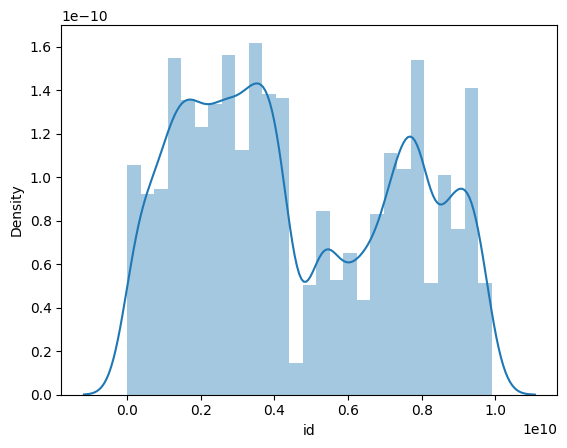

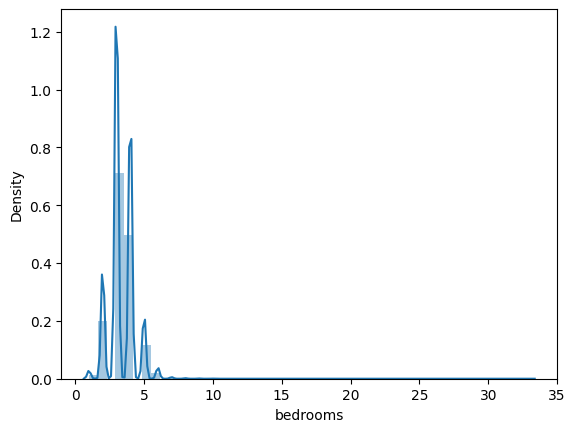

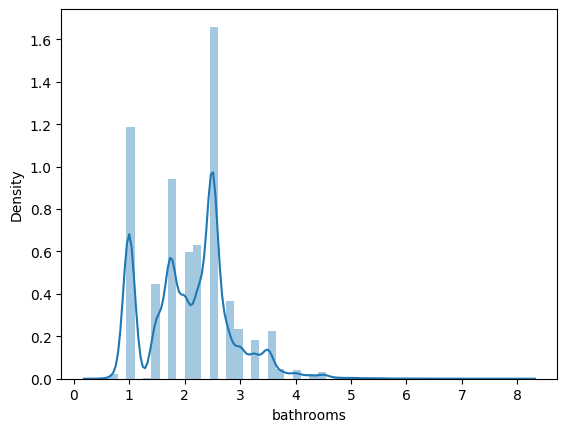

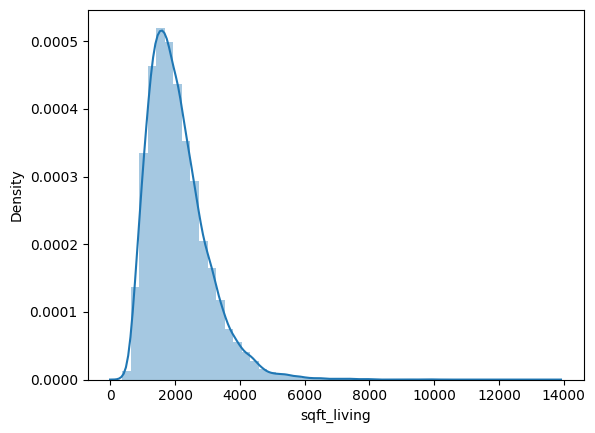

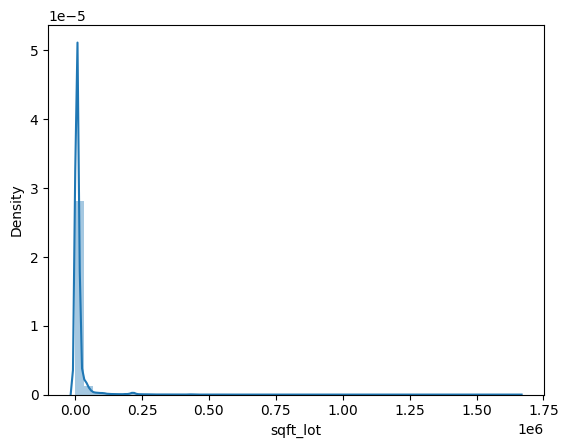

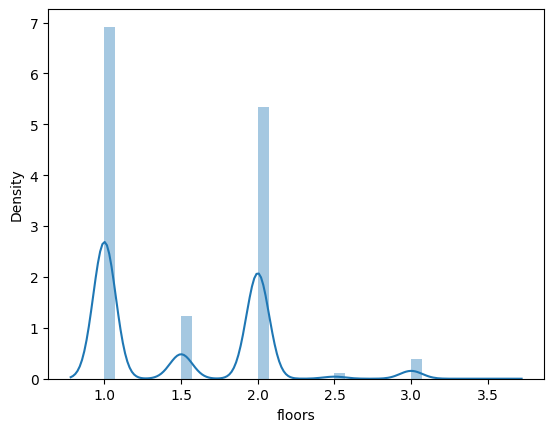

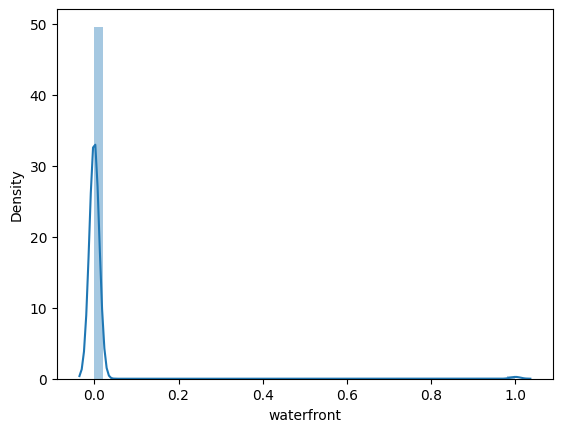

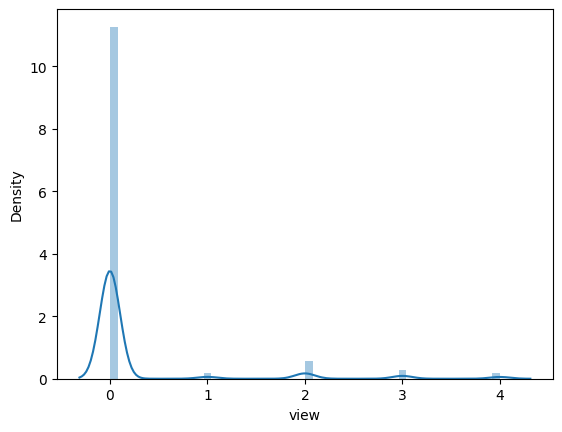

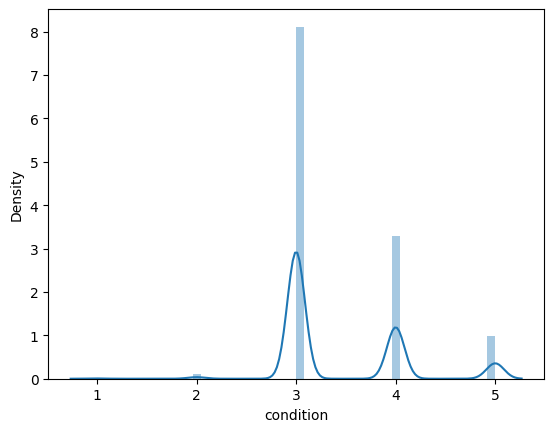

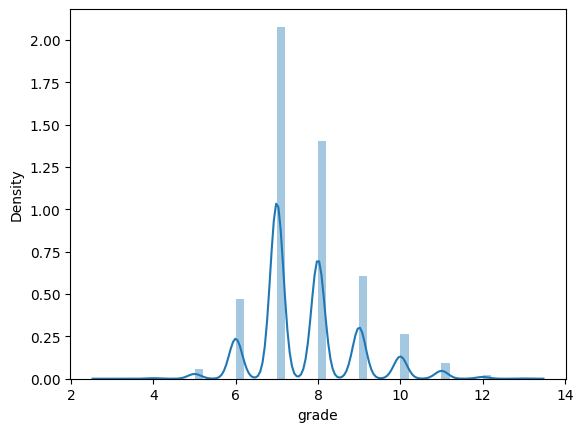

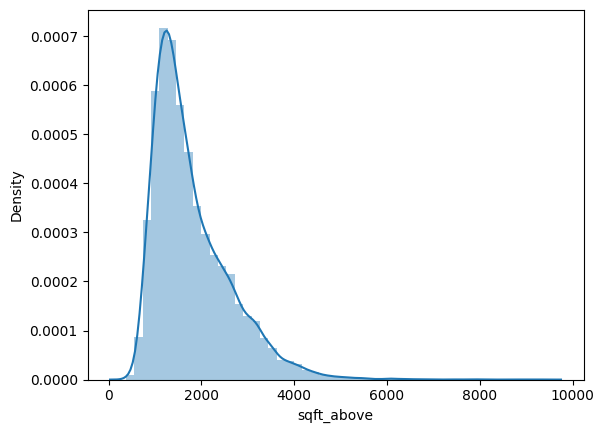

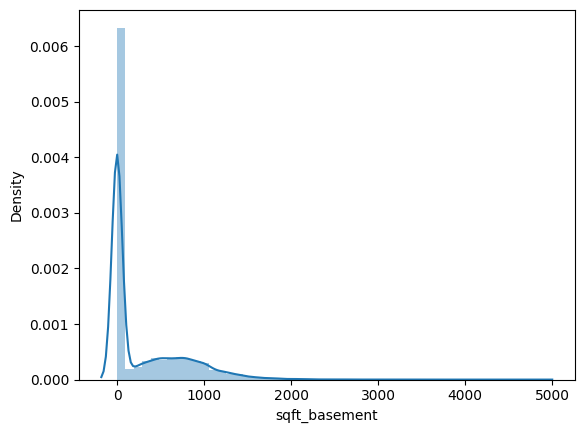

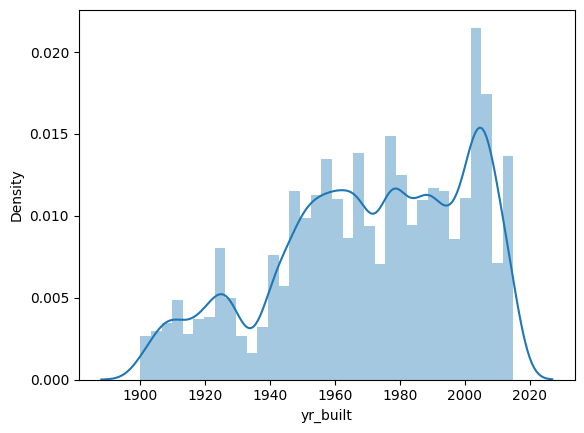

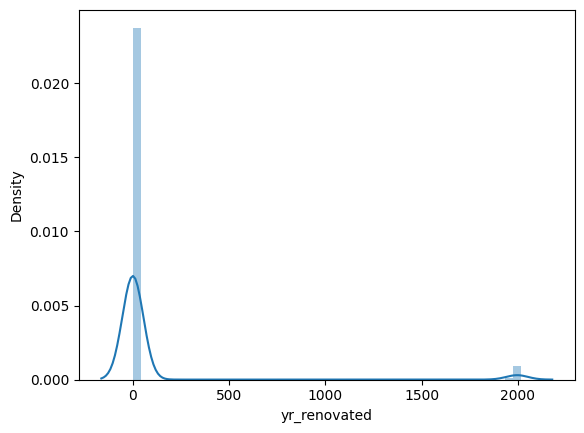

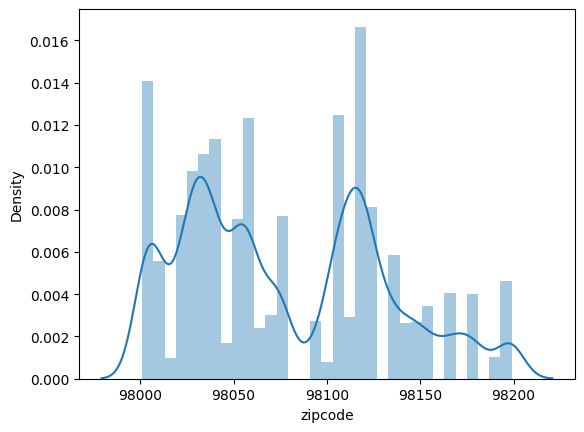

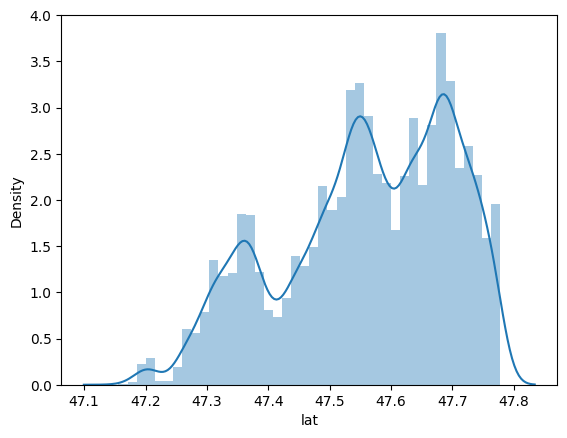

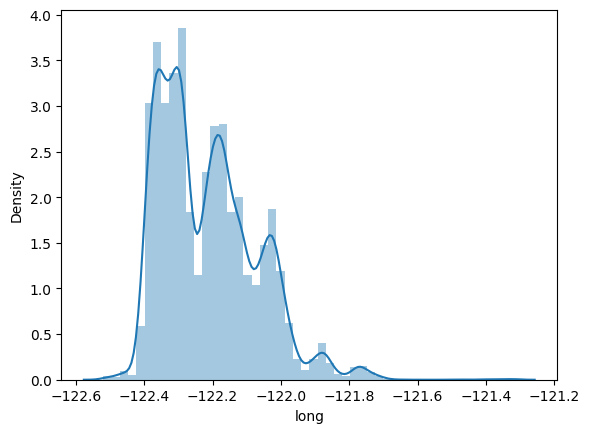

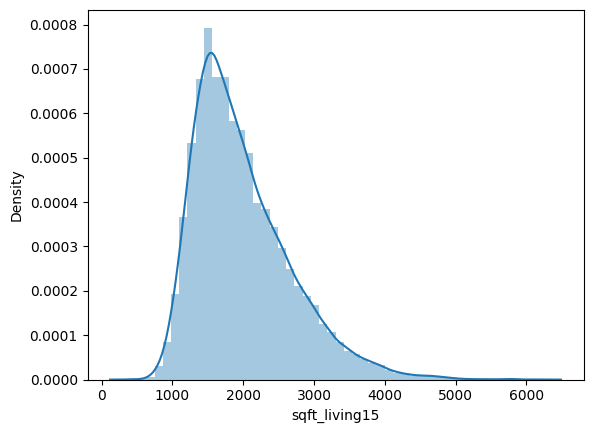

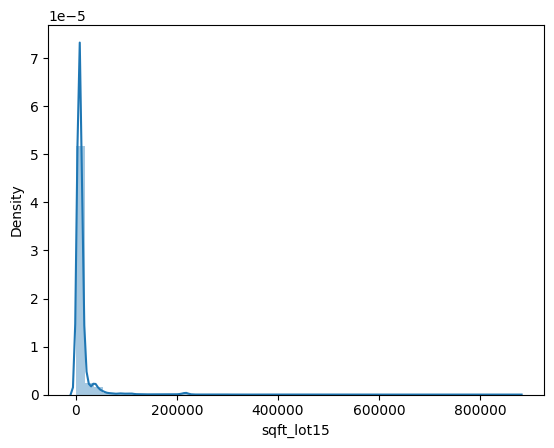

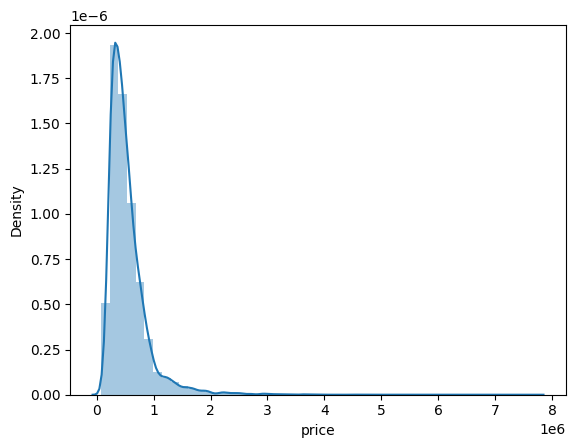

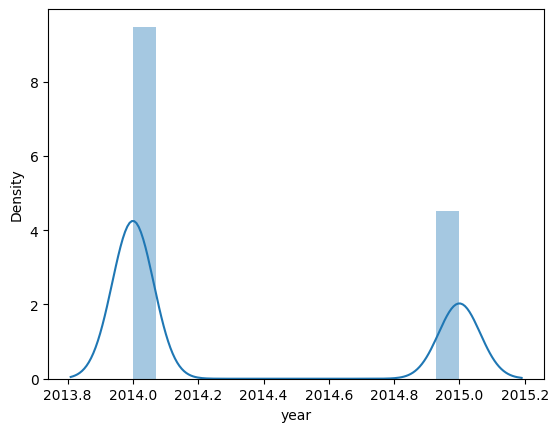

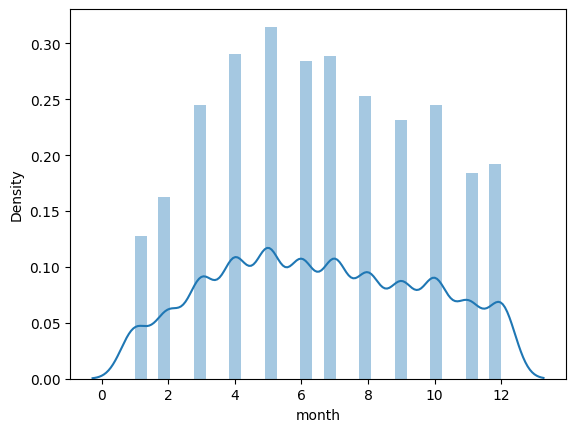

In [38]:
#sqft_living, sqft_above, sqft_living15: These feature are distributed Normally
#To check the skewing and how the data disributed
for i in data_df.select_dtypes(np.number).columns:
    sns.distplot(data_df[i])
    plt.show()

### Checking outliers

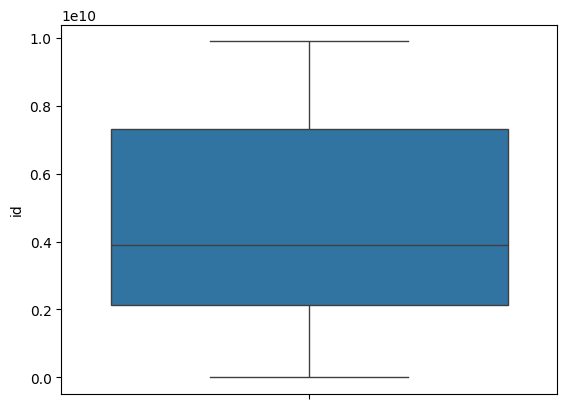

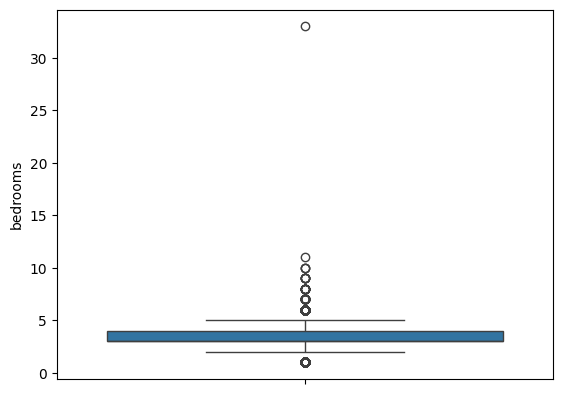

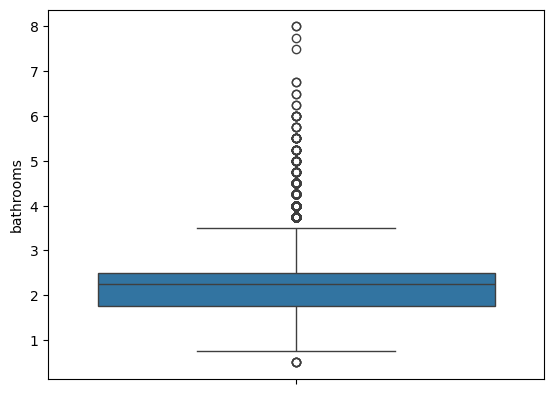

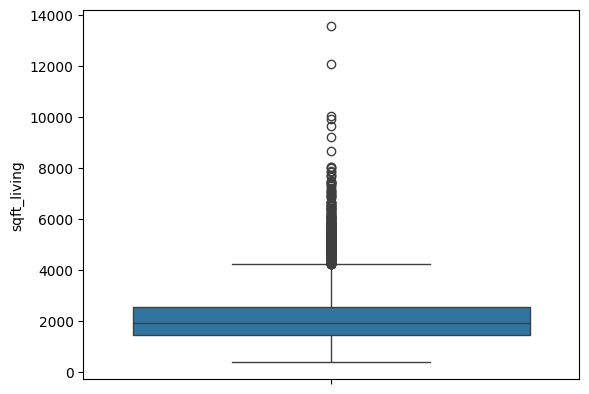

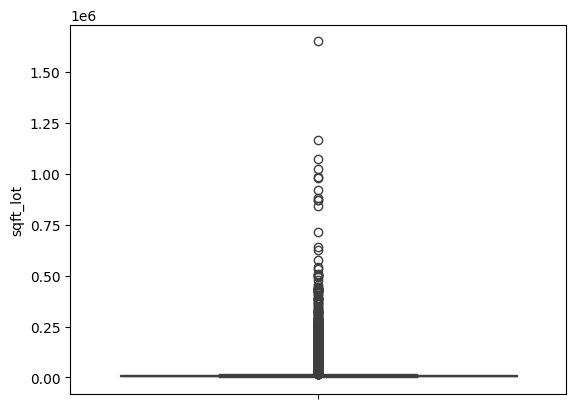

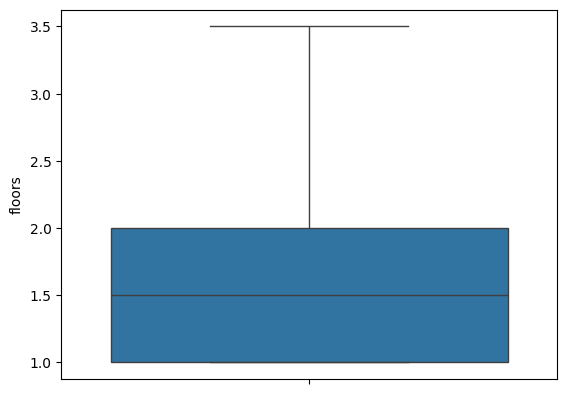

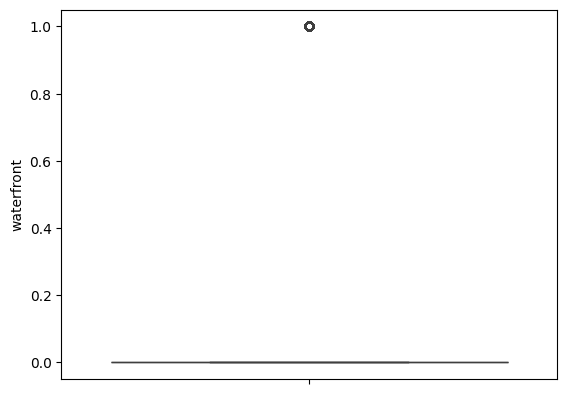

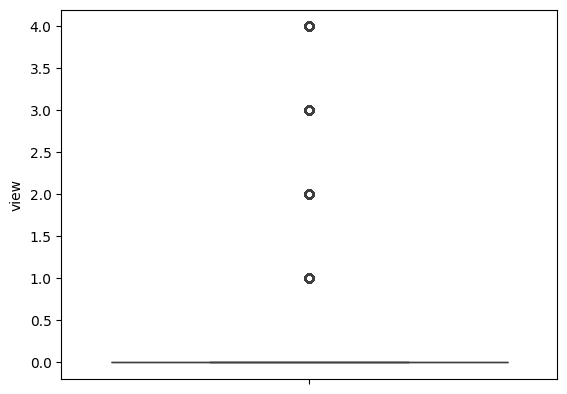

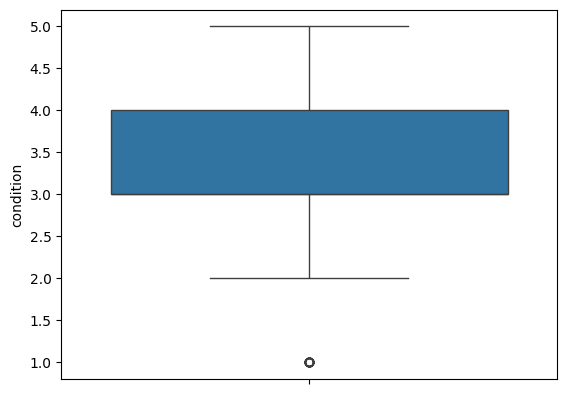

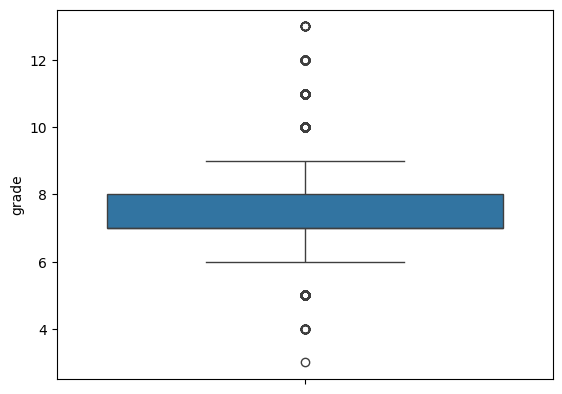

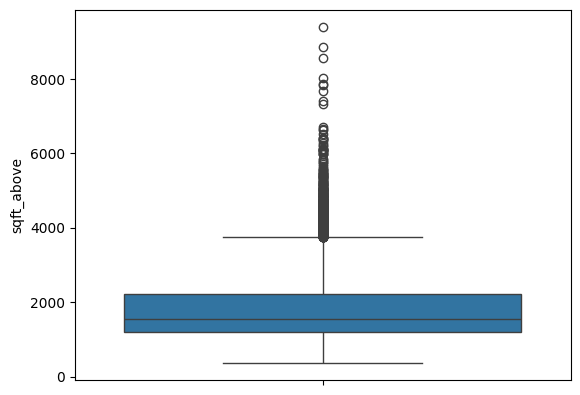

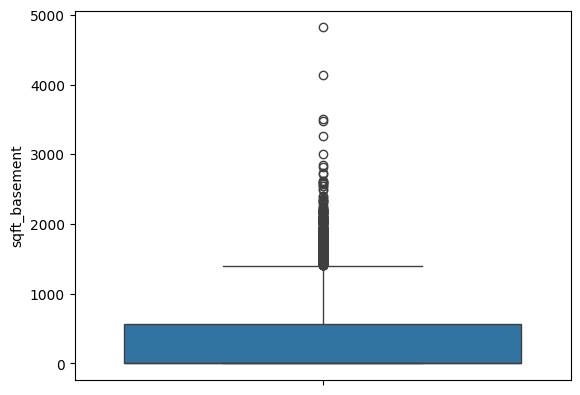

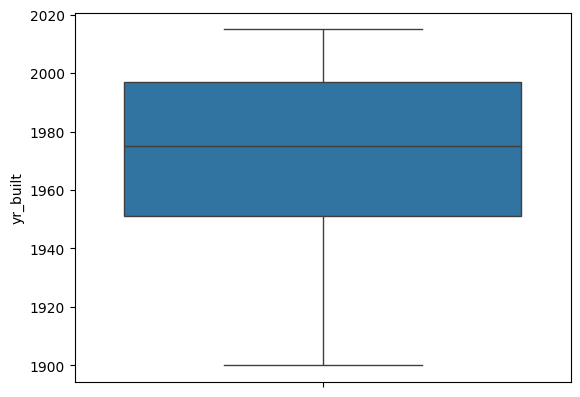

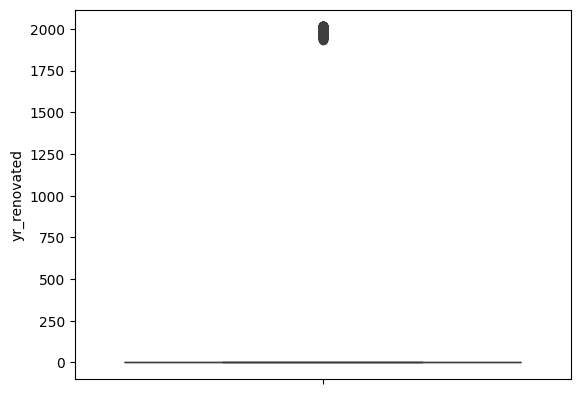

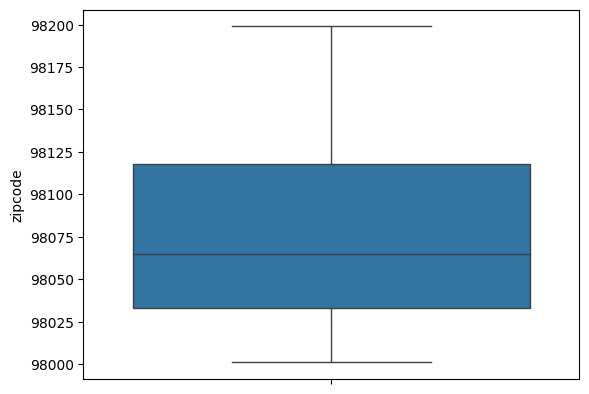

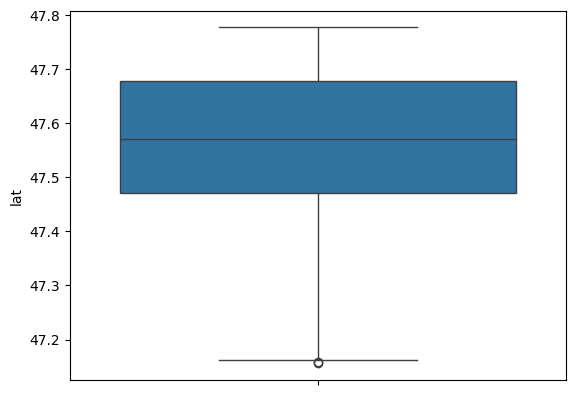

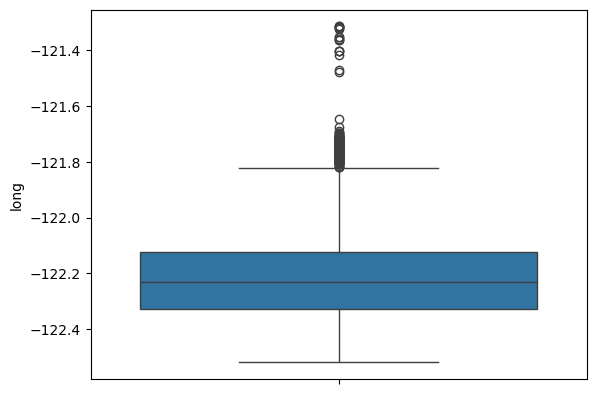

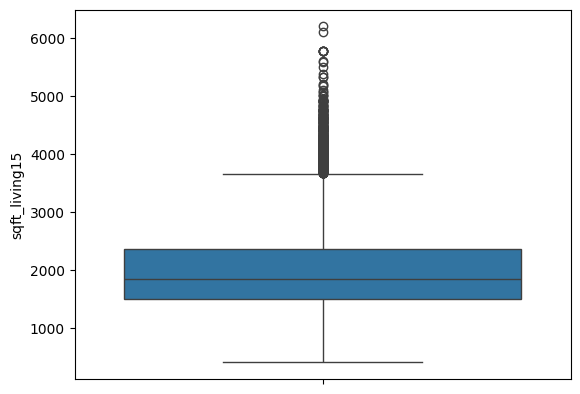

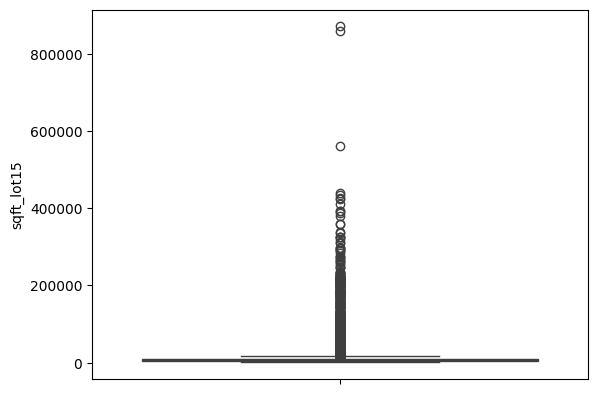

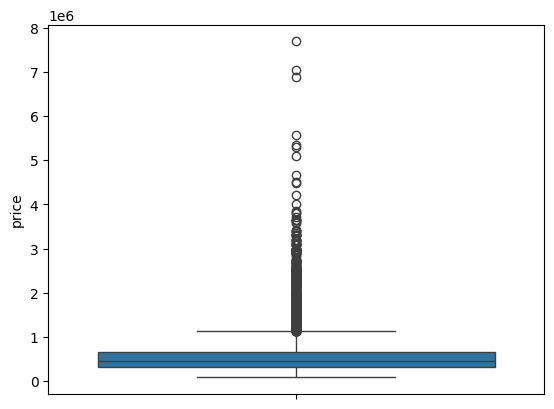

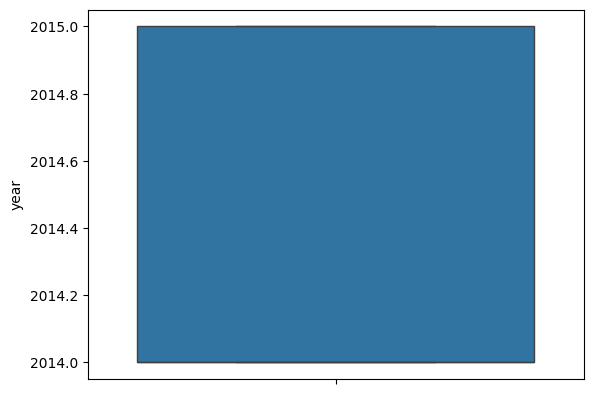

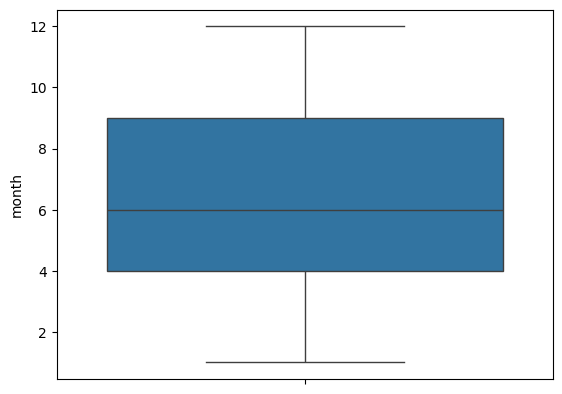

In [39]:
for i in data_df.select_dtypes(np.number).columns:
    sns.boxplot(data_df[i])
    plt.show()

In [42]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [43]:
df = data_df.copy()

df['price'] = df['price'].apply(log_transform).fillna(df['price'].mean())

<Axes: xlabel='price', ylabel='Density'>

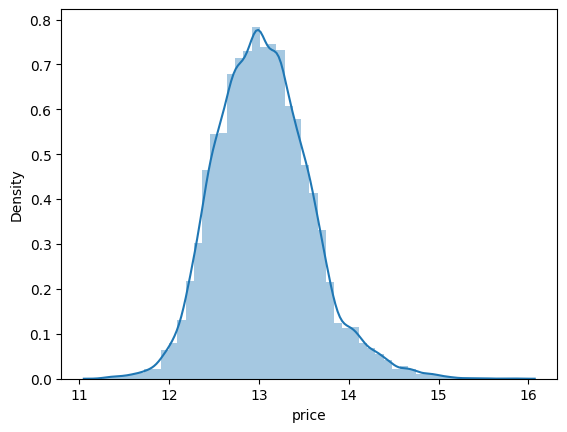

In [44]:
sns.distplot(df['price'])

In [45]:
data_df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [46]:
df.corr()['price'].sort_values()

zipcode         -0.038788
month           -0.013064
id              -0.003751
year             0.004972
condition        0.038918
long             0.050862
yr_built         0.080583
sqft_lot15       0.092281
sqft_lot         0.100025
yr_renovated     0.114485
waterfront       0.174697
floors           0.310630
sqft_basement    0.316920
bedrooms         0.343360
view             0.346635
lat              0.448837
bathrooms        0.551249
sqft_above       0.601579
sqft_living15    0.619326
sqft_living      0.695185
grade            0.703720
price            1.000000
Name: price, dtype: float64

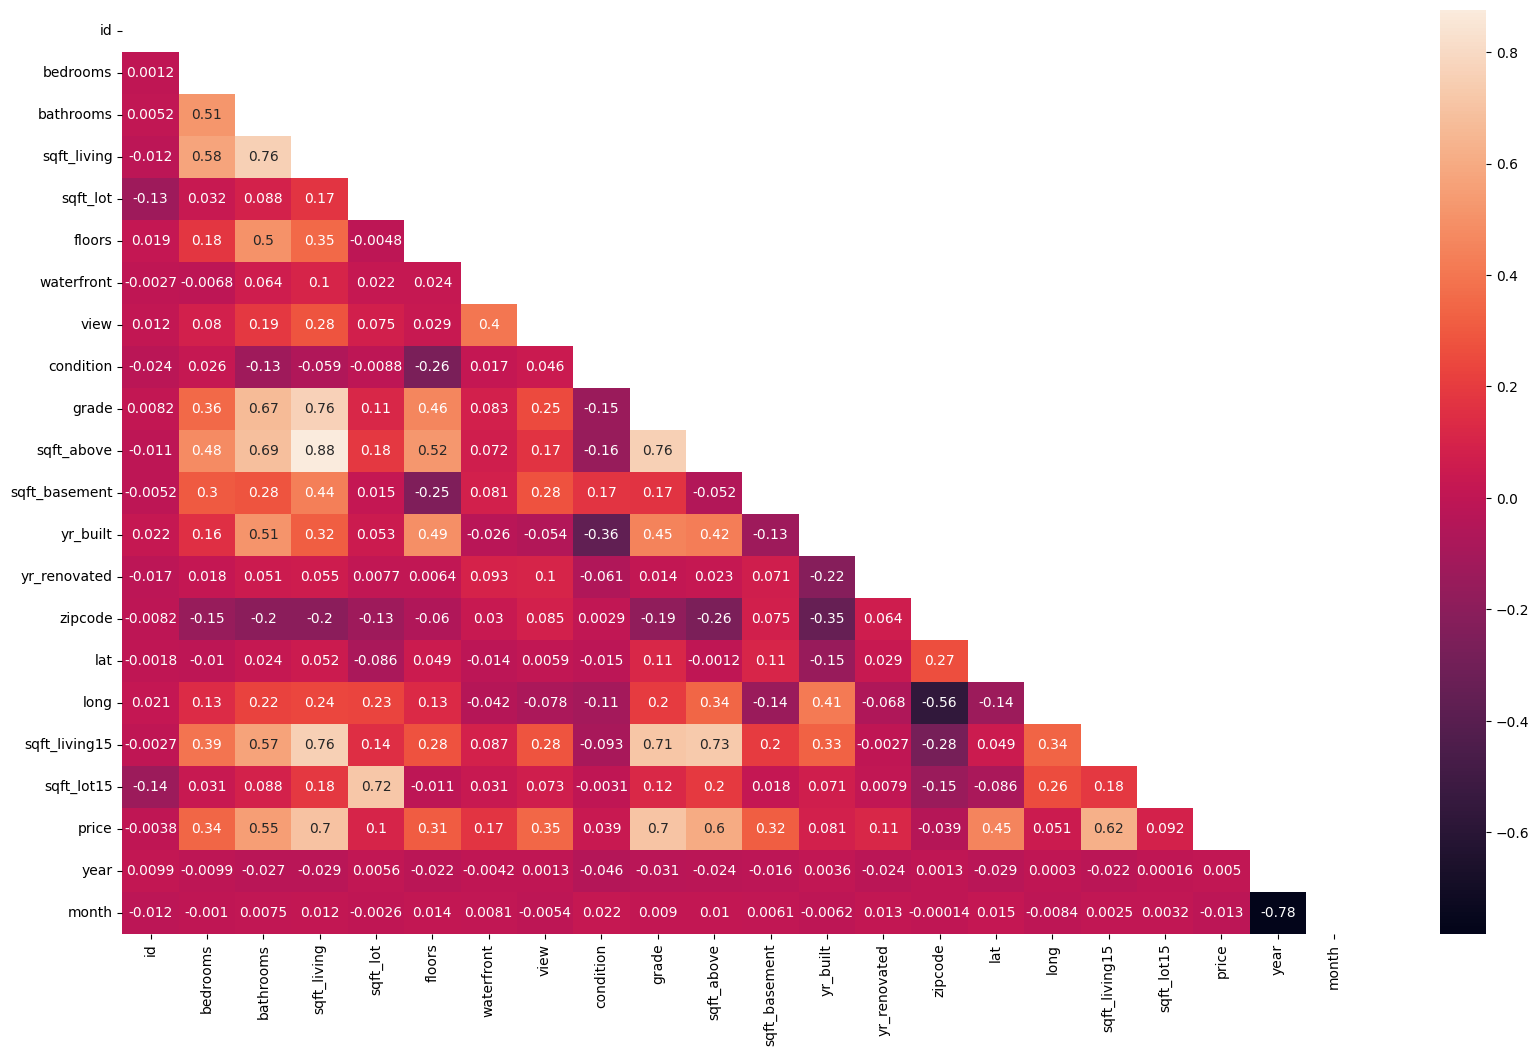

In [48]:
mask= np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

#### Removing outliers

In [49]:
df = df[df['sqft_lot15'] < 700000]

In [50]:
df = df[df['view'] < 3.5]

### Train Test split 

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

Normalizing our data


In [52]:
from sklearn.preprocessing import Normalizer

numericals = X.select_dtypes(np.number) 

transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)

Training the model with Linear regression

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.score(X_test, y_test)

0.7594684210175771

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
predictions = lr.predict(X_test)

In [57]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7594684210175771, 0.19500250633226868, 0.2501119293905948)

MAE: 0.19500250633226868
MSE: 0.06255597722348588
RMSE: 0.2501119293905948


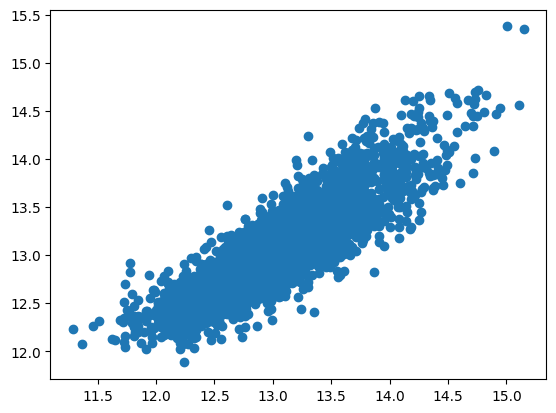

In [58]:
predictions = lr.predict(X_test)  
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 